In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
sd = pd.read_csv('training.1600000.processed.noemoticon.csv',delimiter=',', encoding='ISO-8859-1')

In [4]:
sd.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [6]:
sd.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

In [7]:
sd.columns=['sentiment','id','date','query','username','text']

In [8]:
sd.head()

,sentiment,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
sd.shape

(1048572, 6)

In [10]:
sd['sentiment'].value_counts()

sentiment
0    799996
4    248576
Name: count, dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sentiment', ylabel='Count'>

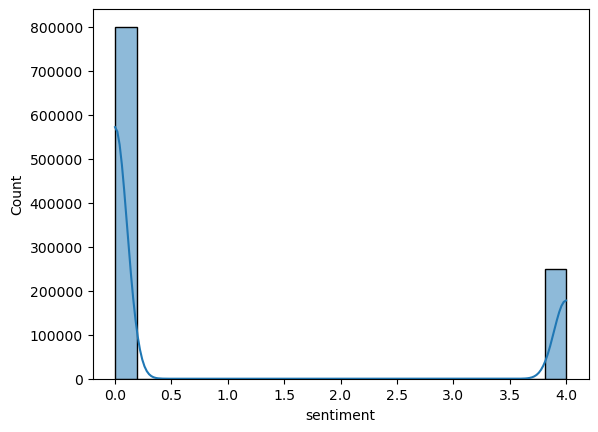

In [12]:
sns.histplot(sd['sentiment'],kde=True)

<Axes: ylabel='count'>

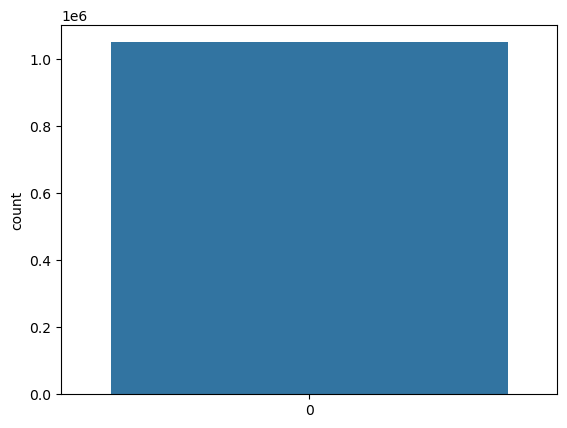

In [13]:
sns.countplot(sd['sentiment'])

In [14]:
sd['query'].value_counts()

query
NO_QUERY    1048572
Name: count, dtype: int64

In [15]:
sd=sd.drop(columns=['query'])

In [16]:
sd.head()

,sentiment,id,date,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [17]:
texts = sd['text']

In [18]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)

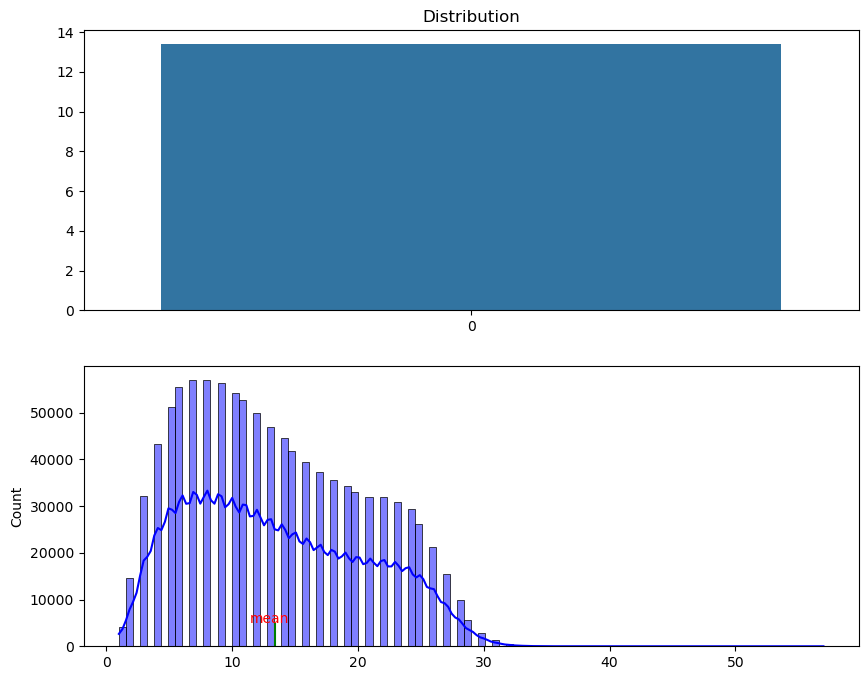

In [19]:
fig, axes = plt.subplots(2,1, figsize=(10, 8))
axes[0].set_title('Distribution')
sns.barplot(text_lens, ax=axes[0])
sns.histplot(text_lens,bins=100, kde=True, ax=axes[1],color='blue')
axes[1].vlines(len_mean, 0, 5000, color = 'g')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),color='r')
plt.show()

In [20]:
import nltk
nltk.download('stopwords')
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = sd['text'].tolist()
print(len(corpus))
print(corpus[0])

1048572
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tayyaba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import nltk
nltk.download('wordnet')
final_corpus = []
final_corpus_joined = []
for i in sd.index:
    text = re.sub('[^a-zA-Z]', ' ', sd['text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text  if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tayyaba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = sd["sentiment"].values

In [23]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = sd['sentiment'].values
data_eda.head()

,text,sentiment
0,"[upset, update, facebook, texting, might, cry,...",0
1,"[kenichan, dived, many, time, ball, managed, s...",0
2,"[whole, body, feel, itchy, like, fire]",0
3,"[nationwideclass, behaving, mad, see]",0
4,"[kwesidei, whole, crew]",0


In [24]:
positive = data_eda[data_eda['sentiment'] == 4]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiment'] == 0]
negative_list = negative['text'].tolist()

In [25]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

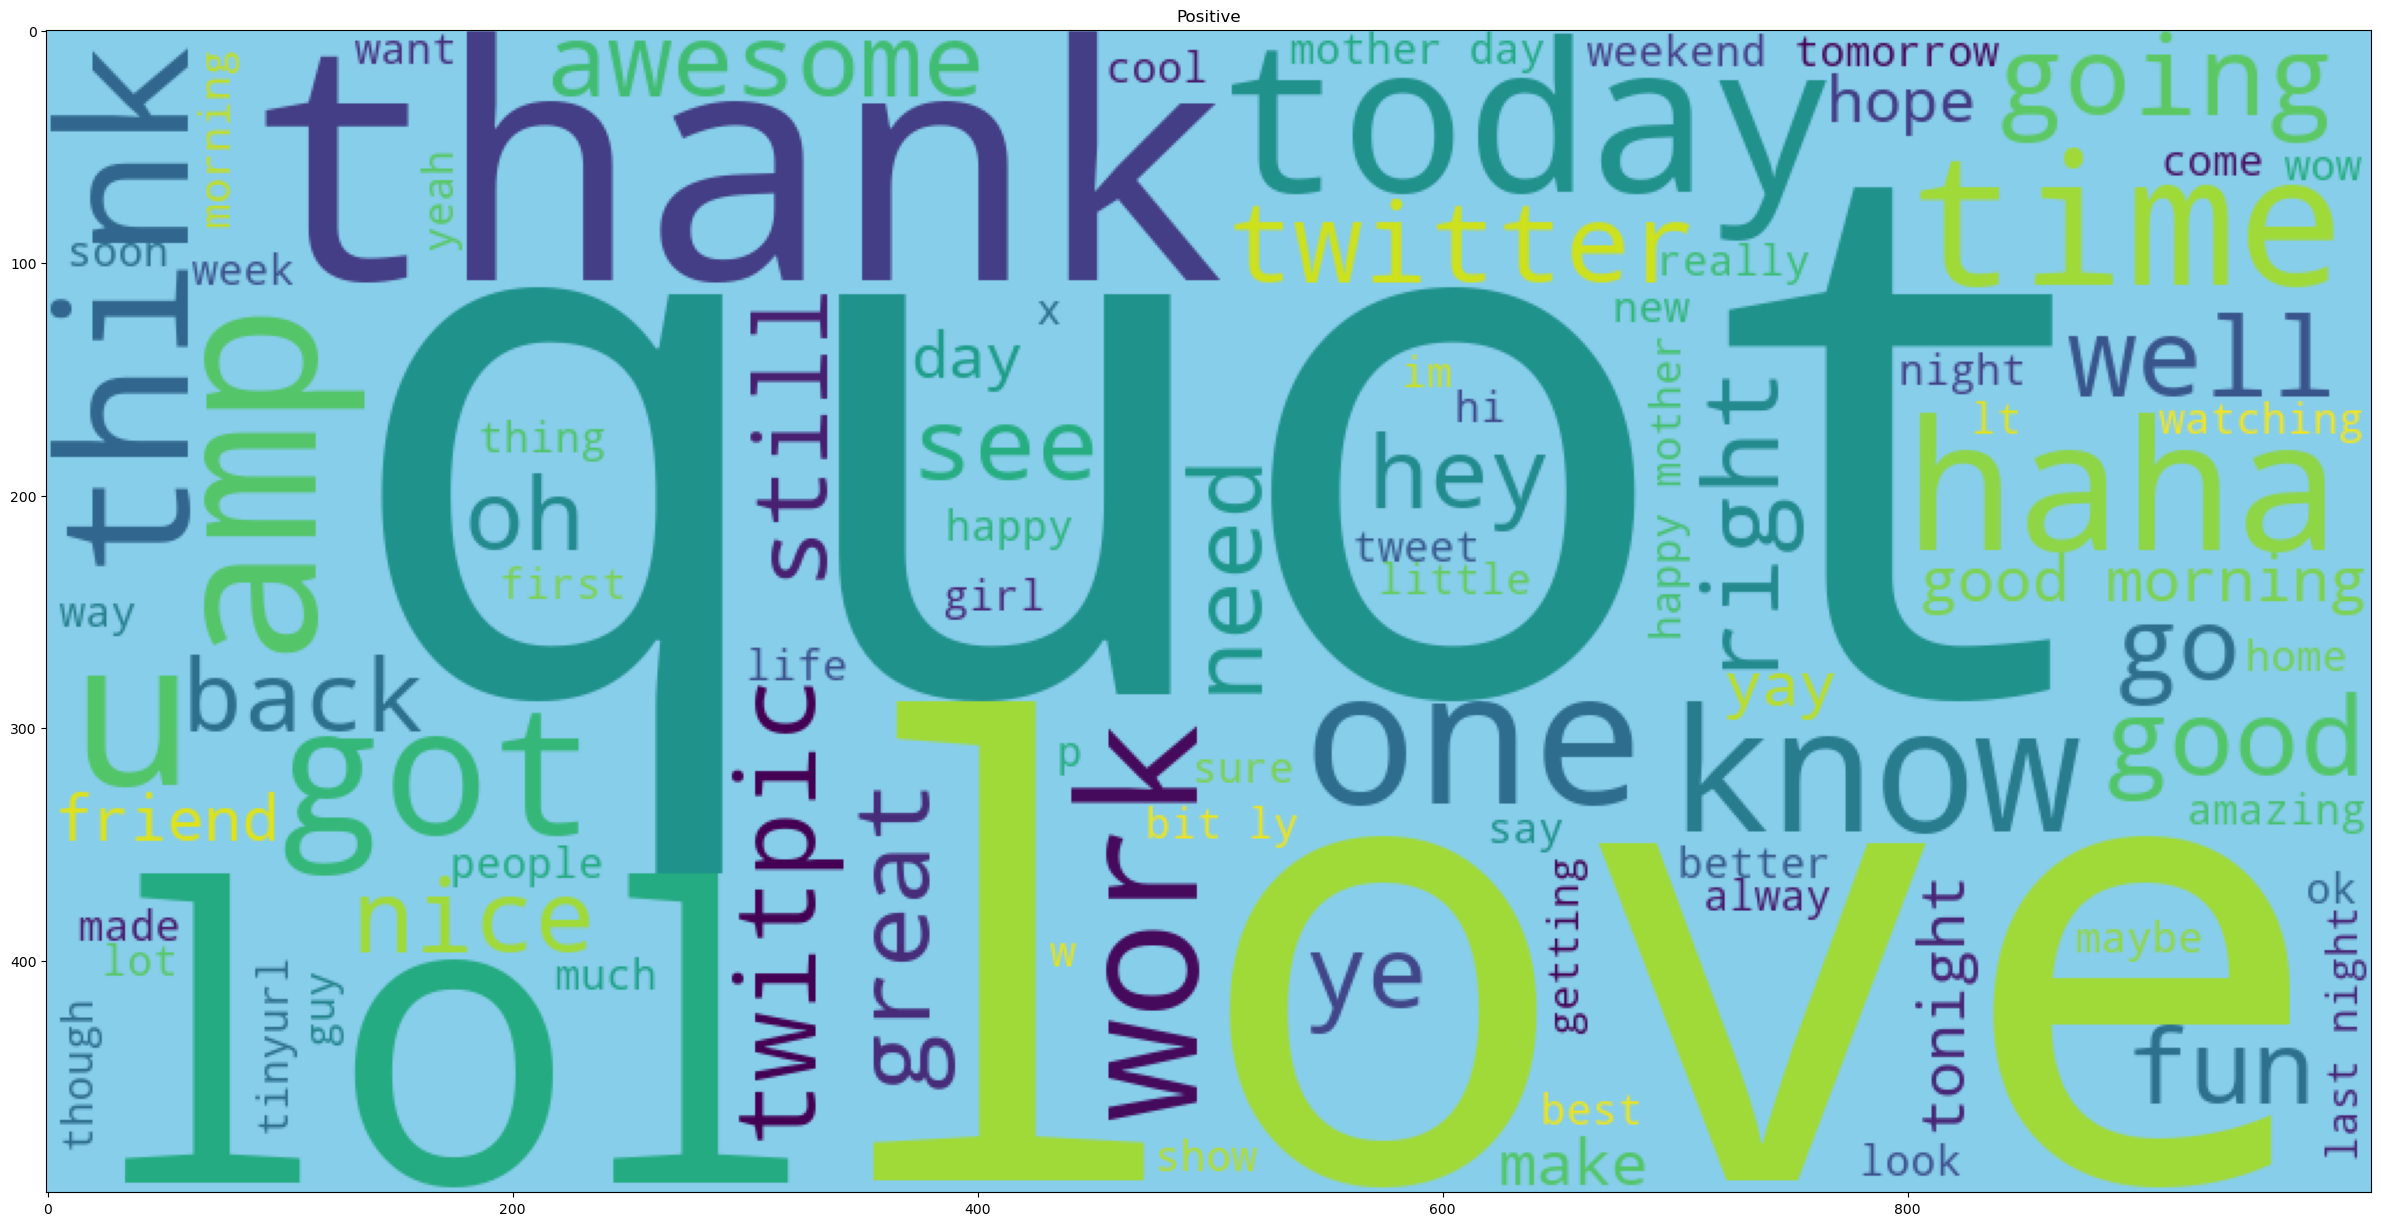

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000, height=500, background_color='skyblue', max_words = 90).generate(positive_all)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

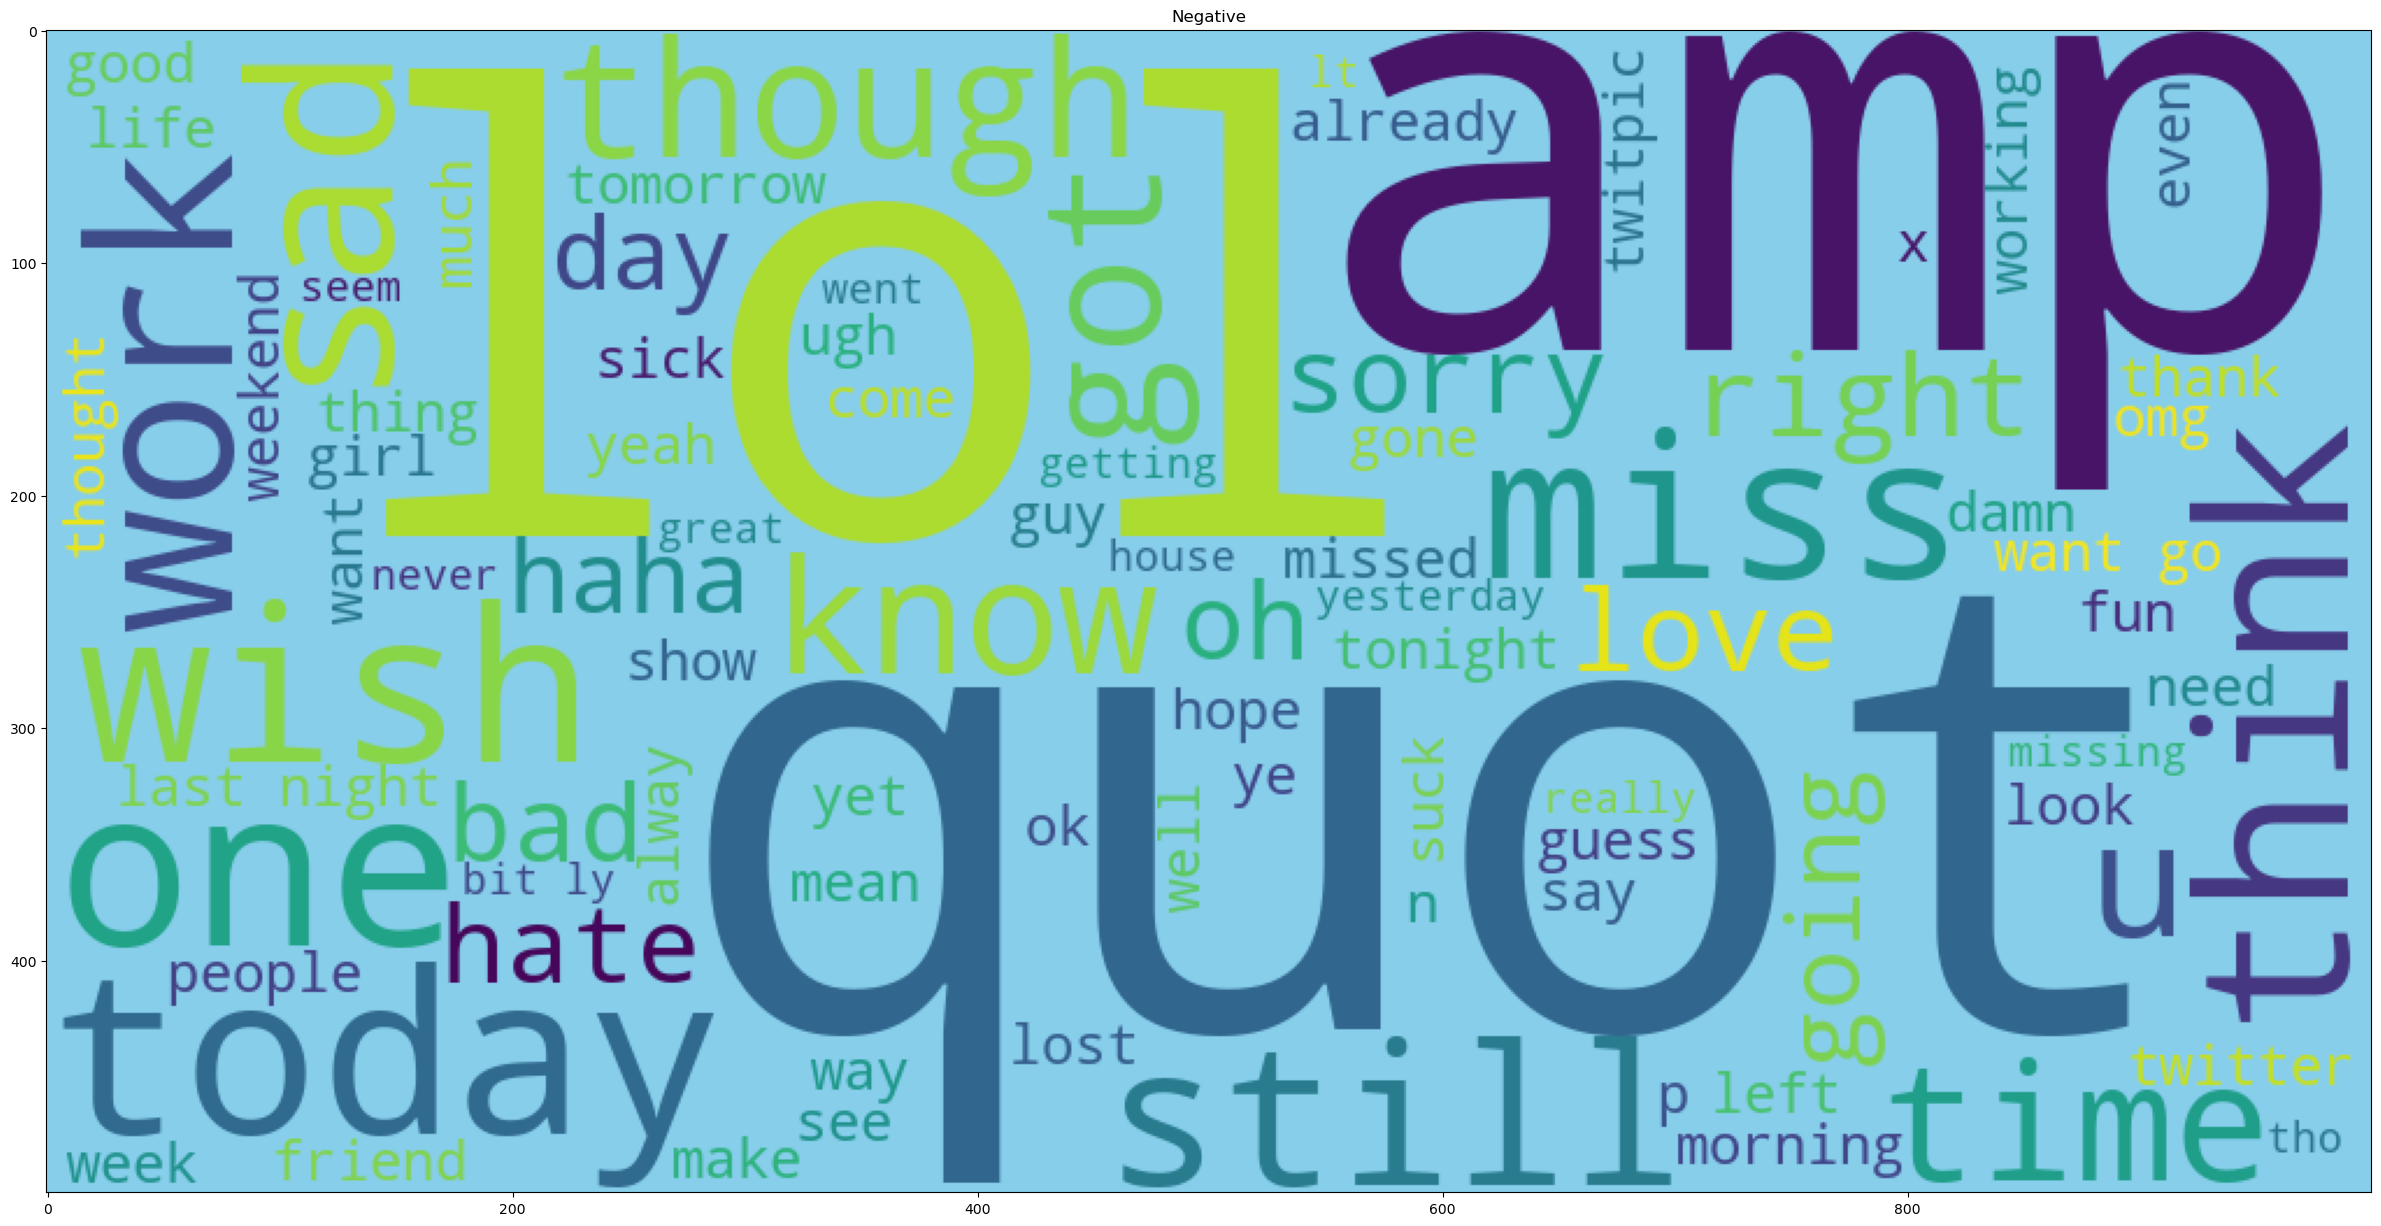

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000, height=500, background_color='skyblue', max_words = 90).generate(negative_all)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Negative")
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xt = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['sentiment']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt, y, test_size=0.33, random_state=42, stratify = y)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score(y_train,y_train_pred)*100

85.6239404563137